In [1]:
import re
import nltk
import random

In [2]:
from nltk.tokenize import RegexpTokenizer

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Here we choose 5 books with different authors.

In [7]:
books=["austen-emma.txt",
       "bible-kjv.txt",
"chesterton-thursday.txt",
"milton-paradise.txt",
"melville-moby_dick.txt",]

# Data preprocessing and cleansing

In [8]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [9]:
print(lst_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Collecting samples, removing punctuations and stopwords, stemming and lemmatisation, labeling.

In [10]:
sample_set=[]

for k, book in enumerate(books):
    
    text = nltk.corpus.gutenberg.raw(book)
    # The following three steps must be taken so that words like "Dr.", "Mary's", "_mother_" can be processed properly.
    text=" '".join(text.split("'"))
    text=" .".join(text.split("."))
    text=" ".join(text.split("_"))
    
    # Remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_word=tokenizer.tokenize(text)
    #tokenized_word=nltk.word_tokenize(text)
    
    lst_text = [word for word in tokenized_word if word not in 
                    lst_stopwords]
    
    ## Stemming (remove -ing, -ly, ...)
    
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
    
    print(book)
    print("size before removing stopwords: ", len(tokenized_word))
    print("size after removing stopwords: ", len(lst_text))
    
    doc = "" # empty segment
    chunked_docs=[] # set of segments

    
    for i, word in enumerate(lst_text,1): # note that i starts from 1 here

        doc = doc + " " + word 
        if i%150==0: # note that i starts from 1 as we illustrate before
            chunked_docs.append((doc, k)) # labeling the segment
            doc = ""

    # verify if each sample contains 150 words
    count=0
    for i in range(len(chunked_docs)):
        tokenized_chunked_docs=tokenizer.tokenize(chunked_docs[i][0])
        if len(tokenized_chunked_docs)!=150:
            count+=1
    print("number of samples that are not 150 words: ", count)
    print("")

    index=[] # used for recording indices that have been used. 
    samples=[]
    for i in range(0,200):
        idx=random.randint(0,len(chunked_docs)-1)
        while idx in index: # continue to get a index that has not been used before
            idx=random.randint(0,len(chunked_docs)-1)
        index.append(idx)
        samples.append(chunked_docs[idx])
    
    sample_set+=samples

austen-emma.txt
size before removing stopwords:  161980
size after removing stopwords:  81613
number of samples that are not 150 words:  0

bible-kjv.txt
size before removing stopwords:  854046
size after removing stopwords:  476079
number of samples that are not 150 words:  0

chesterton-thursday.txt
size before removing stopwords:  58729
size after removing stopwords:  31640
number of samples that are not 150 words:  0

milton-paradise.txt
size before removing stopwords:  80497
size after removing stopwords:  52975
number of samples that are not 150 words:  0

melville-moby_dick.txt
size before removing stopwords:  218619
size after removing stopwords:  119078
number of samples that are not 150 words:  0



In [11]:
len(sample_set)

1000

In [12]:
print(sample_set[0])

(' and lost harriet sake thought hereaft find harriet societi want harriet chosen first dearest friend wife look best bless exist could increas emma wretched reflect never far distant mind work when came pitch abl refrain start heavi sigh even walk room second sourc whenc thing like consol composur could drawn resolut better conduct hope howev inferior spirit gaieti might follow everi futur winter life past would yet find ration acquaint leav le regret gone chapter xiii the weather continu much follow morn loneli melancholi seem reign hartfield afternoon clear wind chang softer quarter cloud carri sun appear summer with eager transit give emma resolv door soon possibl never exquisit sight smell sensat natur tranquil warm brilliant storm attract she long seren might gradual introduc mr perri come soon dinner disengag hour give father lost time ill hurri shrubberi there spirit freshen thought littl reliev taken turn saw mr knightley pas', 0)


In [13]:
features=[]
targets=[]
for i in sample_set:
    features.append(i[0])
    targets.append(i[1])

In [14]:
#!pip install wordcloud

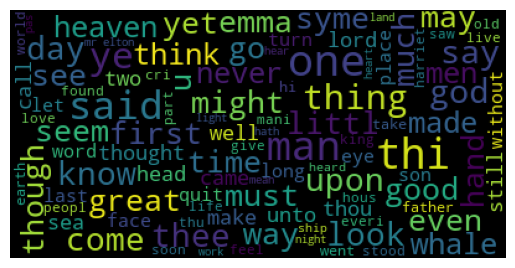

In [15]:
# Visualization:
import wordcloud
import matplotlib.pyplot as plt
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(sample_set))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
print('\n')

# Feature engineering

# BOW

In [16]:
# Transformation BOW 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(features)

In [17]:
X_train_counts.shape

(1000, 11082)

# n-gram

In [18]:
# n-gram Count Vectorization
count_vect_gram = CountVectorizer(ngram_range = (1, 2))
X_train_counts_gram = count_vect.fit_transform(features)
X_train_counts_gram.shape
print(X_train_counts_gram.shape)


(1000, 11082)


# TF-IDF

In [19]:
# TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1000, 11082)

# n-gram TF-IDF

In [20]:
# n-gram TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_gram = TfidfVectorizer(use_idf=True, ngram_range = (1, 2)) 
X_train_tfidf_gram = tfidf_vectorizer_gram.fit_transform(features)
X_train_tfidf_gram.shape
print(X_train_tfidf_gram.shape)

(1000, 128876)


# KMeans & Elbow method

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

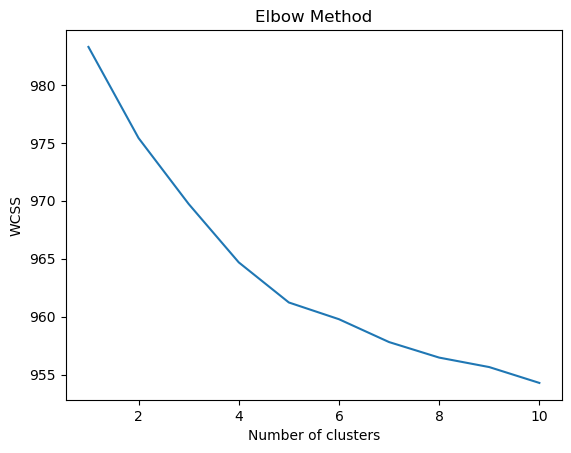

In [22]:
# within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_tfidf_gram)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Though not clear enough, we can still see the slight bend at k=5, which is slightly more significant than those elsewhere, meaning that the optimal number of clusters is 5.

# Prediction result

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train_tfidf_gram)

In [24]:
print(pred_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [25]:
from scipy import stats
ideal=[]
ideal_index=[]
for i in range(0,5):
    ideal_index.append(stats.mode(pred_y[i*200:(i+1)*200])[0][0])
    
for i in ideal_index:
    for j in range(0,200):
        ideal.append(i)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3248\4213236507.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ideal_index.append(stats.mode(pred_y[i*200:(i+1)*200])[0][0])


# kappa score

In [26]:
from sklearn.metrics import cohen_kappa_score
kappa=cohen_kappa_score(ideal, pred_y)
print(kappa)

0.97875


In [27]:
kappa_scores=[]
silhouette_scores=[]
coherence_scores=[]

In [28]:
kappa_scores.append(kappa)

# silhouette score

In [29]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(X_train_tfidf_gram, pred_y)
print(sil)

0.009555975667377634


In [30]:
silhouette_scores.append(sil)

# coherence in each cluster

In [31]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [32]:
coherences=[]
for k in range(0,5):
    dictionary_set=[]
    for i in range(0, len(pred_y)):
        if pred_y[i]==ideal_index[k]:
            dictionary_set.append(tokenizer.tokenize(sample_set[i][0]))

    dictionary = Dictionary(dictionary_set)
    bow_corpus = [dictionary.doc2bow(doc) for doc in dictionary_set]

    model = LdaModel(bow_corpus, 5, dictionary)

    cm = CoherenceModel(model=model, corpus=bow_corpus, coherence='u_mass')
    coherence=cm.get_coherence()  # get coherence value

    print("The coherence for cluster", k+1, "is:", coherence)
    coherences.append(coherence)

average_coherence=sum(coherences)/len(coherences)

print("The average coherence is:", average_coherence)
coherence_scores.append(average_coherence)

The coherence for cluster 1 is: -0.7434931141017678
The coherence for cluster 2 is: -0.8828296063684528
The coherence for cluster 3 is: -0.9526662437407186
The coherence for cluster 4 is: -0.7952672326307628
The coherence for cluster 5 is: -0.9912628083060694
The average coherence is: -0.8731038010295542


# EM algorithm with BIC/AIC evaluation

In [33]:
from sklearn.mixture import GaussianMixture

# dimension reduction

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X2 = pca.fit_transform(X_train_tfidf_gram.toarray())

In [35]:
X_train_tfidf_gram.shape

(1000, 128876)

In [36]:
X2.shape

(1000, 5)

# Find the best number of cluster

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

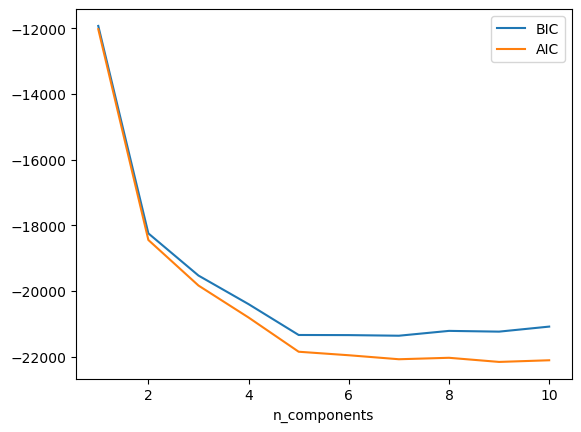

In [37]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X2) for n in n_components]
plt.plot(n_components, [m.bic(X2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# As we can see, from 4 to 5 there is still a drop in BIC/AIC, but from 5 to 6 there will be no significant change in performance, so the best number of cluster is 5.

# Prediction

In [38]:
gmm = GaussianMixture(covariance_type='full', random_state=0, n_components=5)
gmm.fit(X2)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


GaussianMixture(n_components=5, random_state=0)

In [39]:
labels = gmm.predict(X2)

In [40]:
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [41]:
from scipy import stats
ideal=[]
ideal_index=[]
for i in range(0,5):
    ideal_index.append(stats.mode(labels[i*200:(i+1)*200])[0][0])
    
for i in ideal_index:
    for j in range(0,200):
        ideal.append(i)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3248\3179125390.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ideal_index.append(stats.mode(labels[i*200:(i+1)*200])[0][0])


# kappa score

In [42]:
from sklearn.metrics import cohen_kappa_score
kappa=cohen_kappa_score(ideal, labels)
print(kappa)

0.98


In [43]:
kappa_scores.append(kappa)

# silhouette score

In [44]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(X_train_tfidf_gram, labels)
print(sil)

0.009534197963909356


In [45]:
silhouette_scores.append(sil)

# coherence in each cluster

In [46]:
coherences=[]
for k in range(0,5):
    dictionary_set=[]
    for i in range(0, len(labels)):
        if labels[i]==ideal_index[k]:
            dictionary_set.append(tokenizer.tokenize(sample_set[i][0]))

    dictionary = Dictionary(dictionary_set)
    bow_corpus = [dictionary.doc2bow(doc) for doc in dictionary_set]

    model = LdaModel(bow_corpus, 5, dictionary)

    cm = CoherenceModel(model=model, corpus=bow_corpus, coherence='u_mass')
    coherence=cm.get_coherence()  # get coherence value

    print("The coherence for cluster", k+1, "is:", coherence)
    coherences.append(coherence)
    
average_coherence=sum(coherences)/len(coherences)

print("The average coherence is:", average_coherence)
coherence_scores.append(average_coherence)

The coherence for cluster 1 is: -0.7236131410313656
The coherence for cluster 2 is: -0.8939720726189361
The coherence for cluster 3 is: -0.8698479472486745
The coherence for cluster 4 is: -0.7615018301782271
The coherence for cluster 5 is: -0.9948942428430048
The average coherence is: -0.8487658467840415


# hierarchical clustering & dendrogram

In [47]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

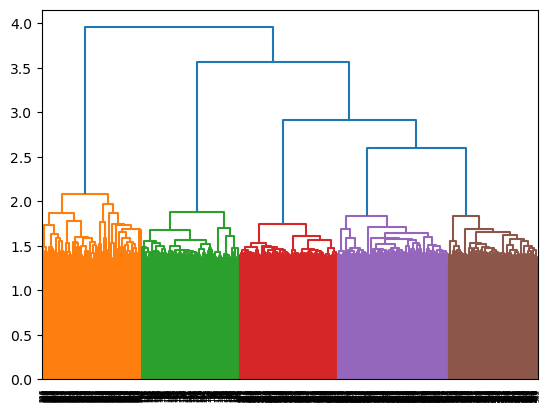

In [48]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_train_tfidf_gram.toarray(), method='ward'), color_threshold=2.25)

# As we can see, this method shows the distinctions among clusters much more clear than other methods.

# prediction

In [49]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train_tfidf_gram.toarray())

D:\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [50]:
print(y_hc)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 4 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [51]:
from scipy import stats
ideal=[]
ideal_index=[]
for i in range(0,5):
    ideal_index.append(stats.mode(y_hc[i*200:(i+1)*200])[0][0])
    
for i in ideal_index:
    for j in range(0,200):
        ideal.append(i)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3248\3999326492.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ideal_index.append(stats.mode(y_hc[i*200:(i+1)*200])[0][0])


# kappa score

In [52]:
kappa=cohen_kappa_score(ideal, y_hc)
print(kappa)

0.9625


In [53]:
kappa_scores.append(kappa)

# silhouette score

In [54]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(X_train_tfidf_gram, y_hc)
print(sil)

0.009319370961433631


In [55]:
silhouette_scores.append(sil)

# coherence in each cluster

In [56]:
coherences=[]
for k in range(0,5):
    dictionary_set=[]
    for i in range(0, len(y_hc)):
        if y_hc[i]==ideal_index[k]:
            dictionary_set.append(tokenizer.tokenize(sample_set[i][0]))

    dictionary = Dictionary(dictionary_set)
    bow_corpus = [dictionary.doc2bow(doc) for doc in dictionary_set]

    model = LdaModel(bow_corpus, 5, dictionary)

    cm = CoherenceModel(model=model, corpus=bow_corpus, coherence='u_mass')
    coherence=cm.get_coherence()  # get coherence value

    print("The coherence for cluster", k+1, "is:", coherence)
    coherences.append(coherence)
    
average_coherence=sum(coherences)/len(coherences)

print("The average coherence is:", average_coherence)
coherence_scores.append(average_coherence)

The coherence for cluster 1 is: -0.7370355807168939
The coherence for cluster 2 is: -0.8476229552185759
The coherence for cluster 3 is: -0.9476746447384448
The coherence for cluster 4 is: -0.7792153667837991
The coherence for cluster 5 is: -1.0390346685881937
The average coherence is: -0.8701166432091814


# Visualization

In [57]:
index_names=["KMeans","EM","Hierarchical"]

Text(0, 0.5, 'value')

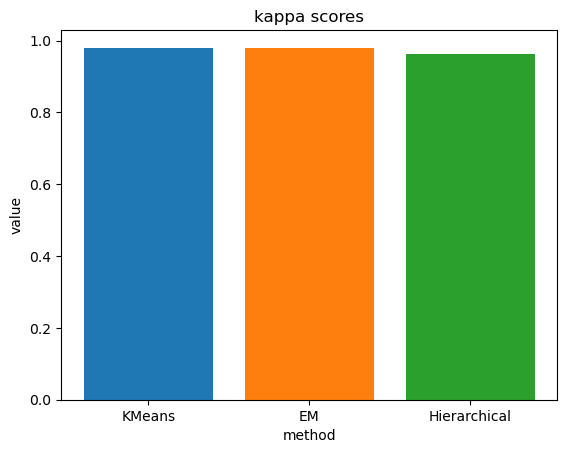

In [58]:
import matplotlib.pyplot as plt
for i in range(len(kappa_scores)):
    plt.bar(index_names[i], kappa_scores[i])

plt.title("kappa scores")
plt.xlabel("method")
plt.ylabel("value")

Text(0, 0.5, 'value')

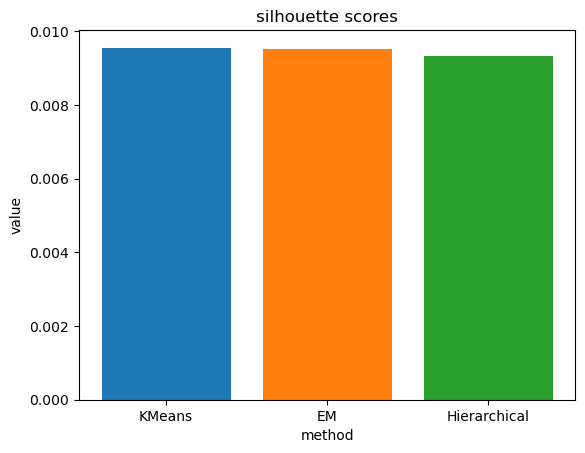

In [59]:
for i in range(len(silhouette_scores)):
    plt.bar(index_names[i], silhouette_scores[i])

plt.title("silhouette scores")
plt.xlabel("method")
plt.ylabel("value")

Text(0, 0.5, 'value')

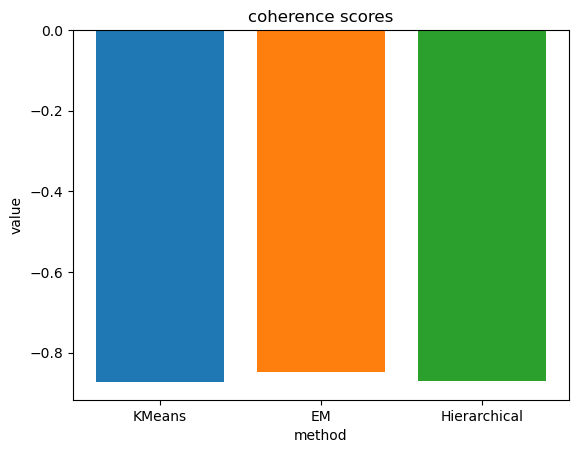

In [60]:
for i in range(len(coherence_scores)):
    plt.bar(index_names[i], coherence_scores[i])

plt.title("coherence scores")
plt.xlabel("method")
plt.ylabel("value")

In [61]:
print(kappa_scores)

[0.97875, 0.98, 0.9625]


In [62]:
print(silhouette_scores)

[0.009555975667377634, 0.009534197963909356, 0.009319370961433631]


In [63]:
print(coherence_scores)

[-0.8731038010295542, -0.8487658467840415, -0.8701166432091814]


# In conclusion, although scores of all models are similar to each other, we still consider that hierarchical clustering with dendrogram is the best method, as it shows the best number of clusters more clearly.

# Note that each time running the code can get slightly different result. Occasionally, it might not be ideal, since samples can be "garbage" sometimes.